# Session 9 - Locality Sensitive Hashing

In this sesion we will play with locality sensitive hashing for retrieving the closer image from a dataset of images to a given one.

The dataset consists of handwritten digits [0..9]. Each one is represented as a matrix of greyscale pixels.

In [9]:
import numpy as np

data = np.load('images.npy')
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

We can also plot them as images

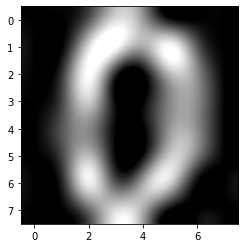

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data[0], cmap=plt.cm.gray, interpolation="lanczos")

You have available the implementation of a class that computes LSH for this images in the file ```lsh.py```.

As an ilustration, the next cell shows an example of how to retrieve similar images to a given one using LSH for this dataset. 

Function ```search``` has three parameters, $k$ is the number of bytes used in the hash function, $m$ is the number of hash functions used to index the images, $i$ is the number of the image to use for the search.

You can observe the time taken to retrieve the candidate images and the number of candidates as $k$ and $m$ change.

The cell also shows the original image and the first of the candidate images (it does not have to be the closest one).

Your can play a little bit with the parameters. 

Your **next task** is to read the documentation for the session and understand how the ```lsh``` class works. After that you can complete the tasks from section 4 in the documentation.

In [11]:
from lsh import lsh

def plot_first_image(lcand):
    if len(lcand) != 0:
        print("Hamming dist=", np.sum(np.abs(data[i+1500]-data[list(lcand)[0]])))       
        fig = plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(10)
        sp1 = fig.add_subplot(1,2,1)
        sp1.imshow(data[i+1500], cmap=plt.cm.gray, interpolation="lanczos")
        sp1 = fig.add_subplot(1,2,2)
        sp1.imshow(data[list(lcand)[0]], cmap=plt.cm.gray, interpolation="lanczos")
        plt.show()

def search(k, m, i):
    """
    Returns a list of candidates for image i using k bits and m hash funcions
    """
    if i + 1500 < data.shape[0]:
        me = lsh(k, m)
        im = me.data[i+1500]
        cands = me.candidates(im)
        print ("there are %4d candidates for image %4d" % (len(cands), i))
        return(cands)

there are   69 candidates for image    1
CPU times: user 548 ms, sys: 12.5 ms, total: 561 ms
Wall time: 524 ms
Hamming dist= 204.0


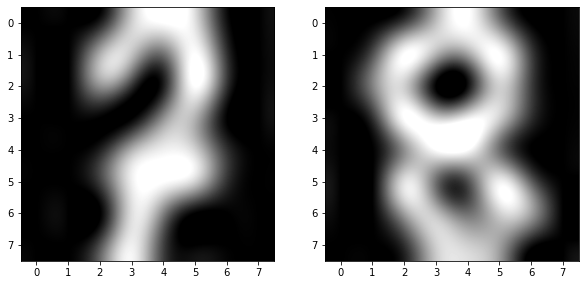

In [16]:
i=1 # The number of image to do the search
%time lcand = search(20,5,i)

plot_first_image(lcand)

there are  230 candidates for image    1
CPU times: user 1.57 s, sys: 27.8 ms, total: 1.59 s
Wall time: 1.54 s
Hamming dist= 174.0


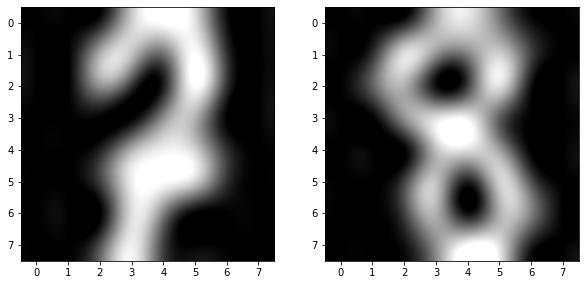

In [17]:
%time lcand = search(20,15,i)

plot_first_image(lcand)

there are    7 candidates for image    1
CPU times: user 1.42 s, sys: 33 ms, total: 1.45 s
Wall time: 1.26 s
Hamming dist= 85.0


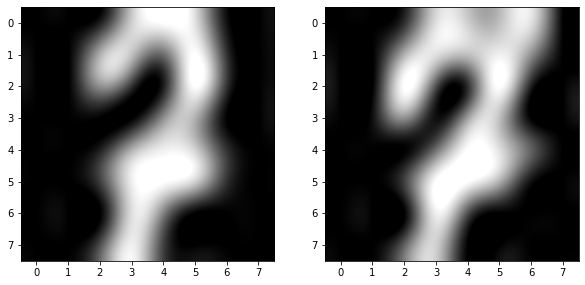

In [18]:
%time lcand = search(40,5,i)

plot_first_image(lcand)

there are    8 candidates for image    1
CPU times: user 4.11 s, sys: 157 ms, total: 4.27 s
Wall time: 3.74 s
Hamming dist= 78.0


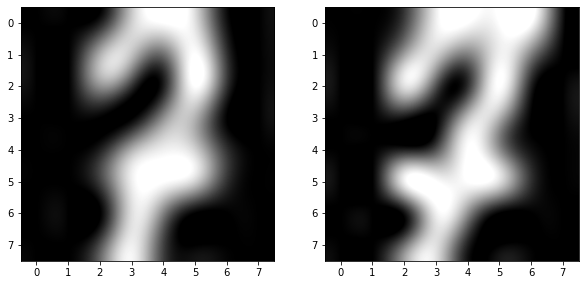

In [19]:
%time lcand = search(40,15,i)

plot_first_image(lcand)